# LCAO for the hydrogen molecule

We plot the Heitler-London approximation, the two-ion approximation, and the combination.

For Heitler-London (combined state is linear combination of product states of two atoms), we get
\begin{equation}
E_\pm^\mathrm{HL} = 2 E_1 \left[ 1 - \frac{a}{R} + \frac{2 D - J \pm (2 X S - K)}{1 \pm S^2} \right].
\end{equation}

For the two-ion approximation, we obtain
\begin{equation}
E^\mathrm{2-ion} = 2 E_1 \left[ 1 - \frac{a}{R} + 2 \frac{D+X}{1+S} - \frac12 \frac{J + 2K + M + 4L}{(1+S)^2} \right].
\end{equation}

where we used the following integrals ($s = R / a$):
\begin{align*}
S(s) &= \left(1 + s + \frac13 s^2\right) e^{-s}, \\
D(s) &= \frac{1}{s} - \left(1 + \frac{1}{s}\right) e^{-2s}, \\
X(s) &= \left(1 + s\right) e^{-s}, \\
J(s) &= \frac{1}{s} - \left[ \frac{1}{s} + \frac{11}{8} + \frac34 s + \frac16 s^2 \right] e^{-2s} \\
K(s) &= \frac15 \left[A(s) - B(s)\right], \\
M(s) &= \frac58, \\
L(s) &= \left( s + \frac18 + \frac{5}{16 s} \right) e^{-s} - \left(\frac18 + \frac{5 }{16 s} \right) e^{-3s}
\end{align*}
and
\begin{align*}
A(s) &= \frac{6}{s} \left[ \left(\gamma + \ln(s) \right) S(s)^2 + \mathrm{Ei}(-4s) S(-s)^2 - 2 \mathrm{Ei}(-2s) S(s) S(-s) \right], \\
B(s) &= \left[ - \frac{25}{8} + \frac{23}{4} s + 3 s^2 + \frac13 s^3 \right] e^{-2s}, \\\mathrm{Ei}(x) &= -\int_{-x}^\infty \frac{e^{-z}}{z} \,\mathrm{d} z
\end{align*}

In [37]:
# Python libraries.

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

In [38]:
# Helper functions / integrals
def S(s):
    return (1 + s + s*s/3) * np.exp(-s)

def D(s):
    return (1/s) - (1 + 1/s) * np.exp(-2*s)

def X(s):
    return (1 + s) * np.exp(-s)

def J(s):
    return (1/s) - (1/s + 11/8 + 3*s/4 + s*s/6) * np.exp(-2*s)

def A(s):
    return (6/s) * ((np.euler_gamma + np.log(s)) * S(s) * S(s) + sc.expi(-4*s) * S(-s) * S(-s) - 2 * sc.expi(-2 * s) * S(s) * S(-s))

def B(s):
    return (-25/8 + 23*s/4 + 3 * s * s + s*s*s/3) * np.exp(-2*s)

def K(s):
    return (A(s) - B(s))/5

def M(s):
    return 5/8

def L(s):
    return (s + 0.125 + 5 / (16*s)) * np.exp(-s) - (0.125 + 5 / (16*s)) * np.exp(-3*s)


In [47]:
def EHLplus(s):
    # Energy from Heitler-London approximation.
    # We return the energy minus 2 E1 and with an overall minus sign as the value of E1 is negative.
    return (2 / s) - 2 * (2 * D(s) - J(s) + 2 * X(s) * S(s) - K(s)) / (1 + S(s) * S(s))

def EHLminus(s):
    return (2 / s) - 2 * (2 * D(s) - J(s) - 2 * X(s) * S(s) + K(s)) / (1 - S(s) * S(s))

def Etwoionplus(s):
    # Energy from taking the product of two hydrogen molecule ion states.
    return (2/s) - 4 * (D(s) + X(s)) / (1+S(s)) + (J(s) + 2 * K(s) + M(s) + 4 * L(s)) / ((1+S(s)) * (1+S(s)))

def Etwoionminus(s):
    #return (2/s) - 4 * (D(s) + X(s)) / (1-S(s)) + (J(s) + 2 * K(s) + M(s) - 4 * L(s)) / ((1-S(s)) * (1-S(s)))
    return (2/s) - 4 * (D(s) - X(s)) / (1-S(s)) + (J(s) + 2 * K(s) + M(s) - 4 * L(s)) / ((1-S(s)) * (1-S(s)))

def H12(s):
    # Additional term in the configuration interaction expectation value.
    #return (1/(2*(1-S(s)*S(s)))) * (M(s) - J(s))
    return (1/((1-S(s)*S(s)))) * (M(s) - J(s))

def ECIplus(s):
    # Energy from configuration interaction optimization.
    return 0.5* (Etwoionplus(s) + Etwoionminus(s) - np.sqrt((Etwoionplus(s) - Etwoionminus(s))*(Etwoionplus(s) - Etwoionminus(s)) + 4 * H12(s) * H12(s)))

def ECIminus(s):
    return 0.5* (Etwoionplus(s) + Etwoionminus(s) + np.sqrt((Etwoionplus(s) - Etwoionminus(s))*(Etwoionplus(s) - Etwoionminus(s)) + 4 * H12(s) * H12(s)))

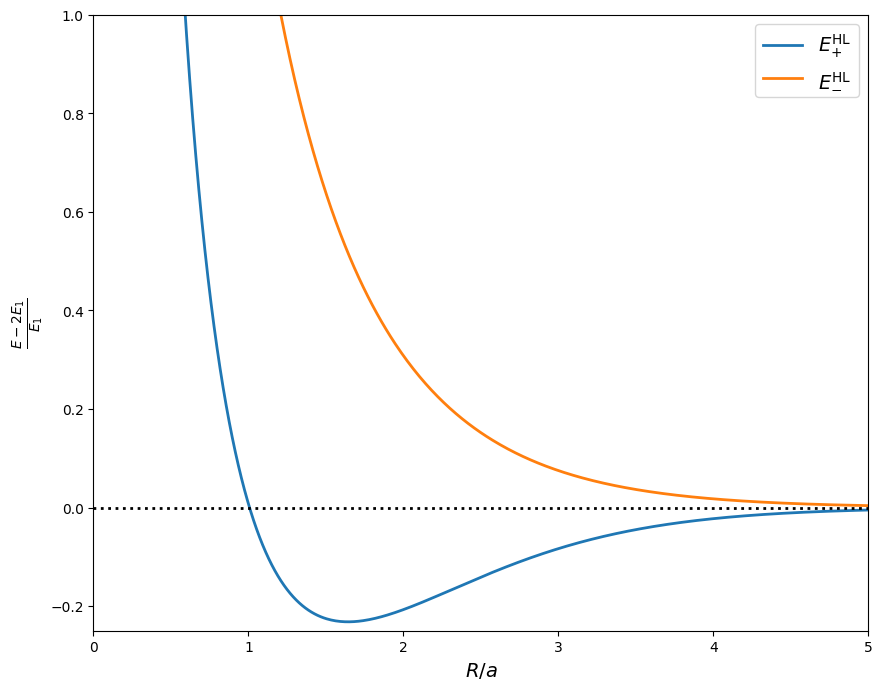

In [22]:
# Plot of HL energy.

fig,ax = plt.subplots(figsize=(10,8))
lw = 2
fs2 = 14

s = np.linspace(0.1, 5, 500)

ax.plot(s, EHLplus(s), lw = lw, label=r'$E_{+}^{\mathrm{HL}}$')
ax.plot(s, EHLminus(s), lw = lw, label=r'$E_{-}^{\mathrm{HL}}$')
ax.set_ylim(-0.25, 1)
ax.set_xlim(0,5)

ax.set_xlabel(r'$R/a$', fontsize = fs2)
ax.set_ylabel(r'$\frac{E - 2 E_1}{E_1}$', fontsize = fs2)

ax.legend(fontsize = fs2)

hline = {"color":"k","linestyle":":","linewidth":lw}

ax.axhline(y = 0, **hline)

#ax.plot(s, A(s))
#ax.plot(s, B(s))

#ax.plot(s, J(s))
#ax.plot(s, K(s))

plt.show()

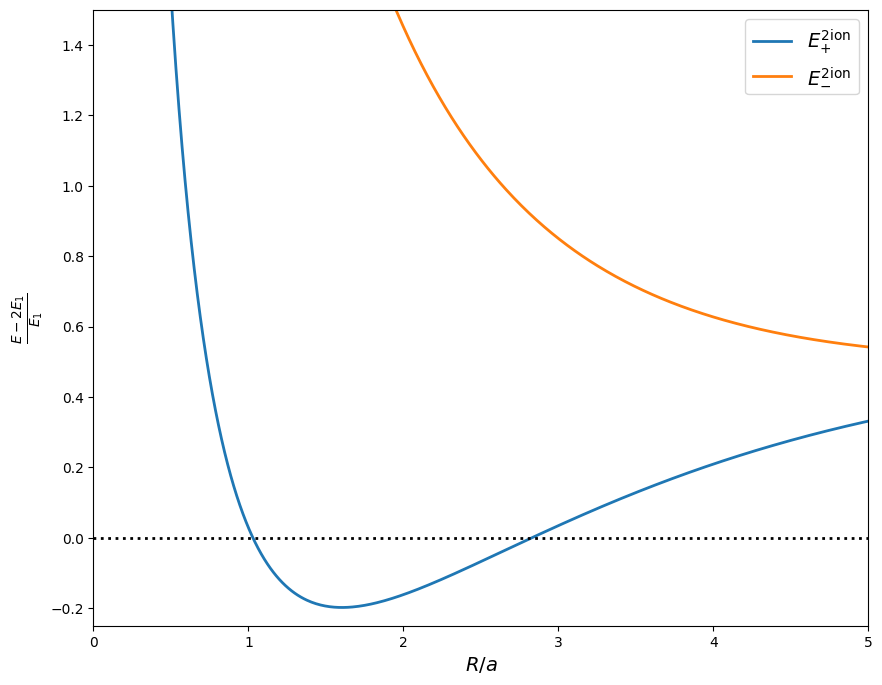

In [45]:
# Plot of 2-ion energy.

fig,ax = plt.subplots(figsize=(10,8))
lw = 2
fs2 = 14

s = np.linspace(0.1, 5, 500)

ax.plot(s, Etwoionplus(s), lw = lw, label=r'$E_{+}^{\mathrm{2ion}}$')
ax.plot(s, Etwoionminus(s), lw = lw, label=r'$E_{-}^{\mathrm{2ion}}$')
ax.set_ylim(-0.25, 1.5)
ax.set_xlim(0,5)

ax.set_xlabel(r'$R/a$', fontsize = fs2)
ax.set_ylabel(r'$\frac{E - 2 E_1}{E_1}$', fontsize = fs2)

ax.legend(fontsize = fs2)

hline = {"color":"k","linestyle":":","linewidth":lw}

ax.axhline(y = 0, **hline)

plt.show()

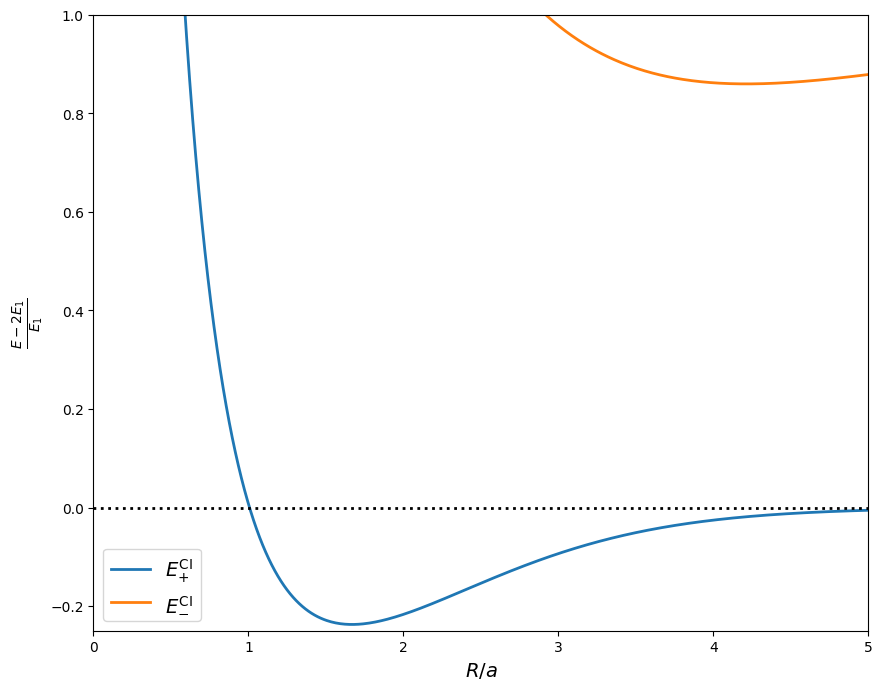

In [48]:
# Plot of CI energy.

fig,ax = plt.subplots(figsize=(10,8))
lw = 2
fs2 = 14

s = np.linspace(0.1, 5, 500)

ax.plot(s, ECIplus(s), lw = lw, label=r'$E_{+}^{\mathrm{CI}}$')
ax.plot(s, ECIminus(s), lw = lw, label=r'$E_{-}^{\mathrm{CI}}$')
ax.set_ylim(-0.25, 1)
ax.set_xlim(0,5)

ax.set_xlabel(r'$R/a$', fontsize = fs2)
ax.set_ylabel(r'$\frac{E - 2 E_1}{E_1}$', fontsize = fs2)

ax.legend(fontsize = fs2)

hline = {"color":"k","linestyle":":","linewidth":lw}

ax.axhline(y = 0, **hline)

plt.show()

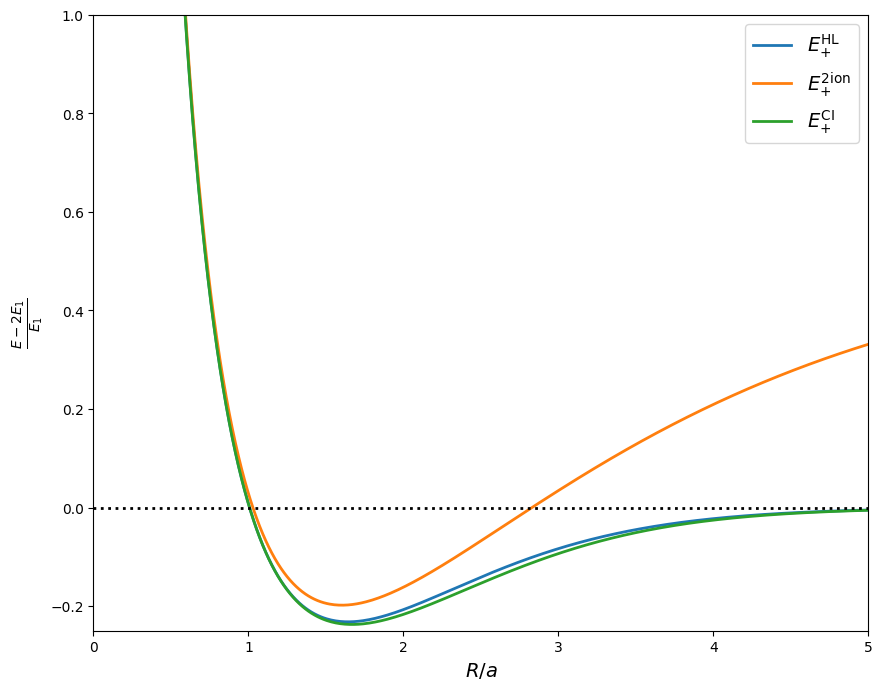

In [49]:
# Comparison of three energy estimates.

fig,ax = plt.subplots(figsize=(10,8))
lw = 2
fs2 = 14

s = np.linspace(0.1, 5, 500)

ax.plot(s, EHLplus(s), lw = lw, label=r'$E_{+}^{\mathrm{HL}}$')
ax.plot(s, Etwoionplus(s), lw = lw, label=r'$E_{+}^{\mathrm{2ion}}$')
ax.plot(s, ECIplus(s), lw = lw, label=r'$E_{+}^{\mathrm{CI}}$')
ax.set_ylim(-0.25, 1)
ax.set_xlim(0,5)

ax.set_xlabel(r'$R/a$', fontsize = fs2)
ax.set_ylabel(r'$\frac{E - 2 E_1}{E_1}$', fontsize = fs2)

ax.legend(fontsize = fs2)

hline = {"color":"k","linestyle":":","linewidth":lw}

ax.axhline(y = 0, **hline)

#ax.plot(s, A(s))
#ax.plot(s, B(s))

#ax.plot(s, J(s))
#ax.plot(s, K(s))

plt.show()

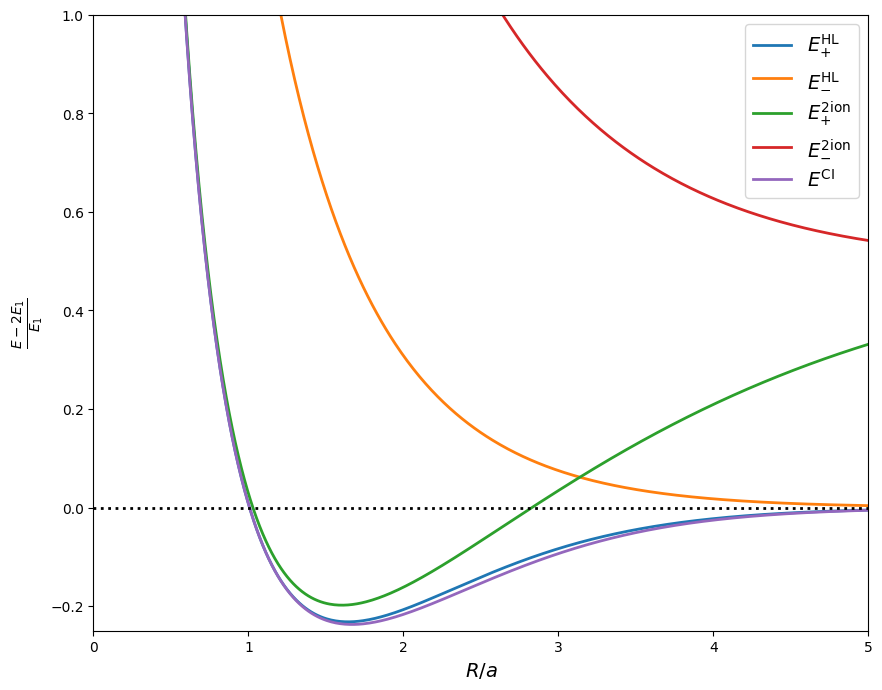

In [51]:
# Comparison of five energy estimates.

fig,ax = plt.subplots(figsize=(10,8))
lw = 2
fs2 = 14

s = np.linspace(0.1, 5, 500)

ax.plot(s, EHLplus(s), lw = lw, label=r'$E_{+}^{\mathrm{HL}}$')
ax.plot(s, EHLminus(s), lw = lw, label=r'$E_{-}^{\mathrm{HL}}$')
ax.plot(s, Etwoionplus(s), lw = lw, label=r'$E_{+}^{\mathrm{2ion}}$')
ax.plot(s, Etwoionminus(s), lw = lw, label=r'$E_{-}^{\mathrm{2ion}}$')
ax.plot(s, ECIplus(s), lw = lw, label=r'$E^{\mathrm{CI}}$')
ax.set_ylim(-0.25, 1)
ax.set_xlim(0,5)

ax.set_xlabel(r'$R/a$', fontsize = fs2)
ax.set_ylabel(r'$\frac{E - 2 E_1}{E_1}$', fontsize = fs2)

ax.legend(fontsize = fs2)

hline = {"color":"k","linestyle":":","linewidth":lw}

ax.axhline(y = 0, **hline)

#ax.plot(s, A(s))
#ax.plot(s, B(s))

#ax.plot(s, J(s))
#ax.plot(s, K(s))

plt.savefig("LCAOhydrogenmolecule.pdf", format="pdf", bbox_inches="tight")

plt.show()